In [1]:
#import the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
#collect the data
titanic = pd.read_csv("titanic.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("No of passangers travelling: " +str(len(titanic.index)))

No of passangers travelling: 891


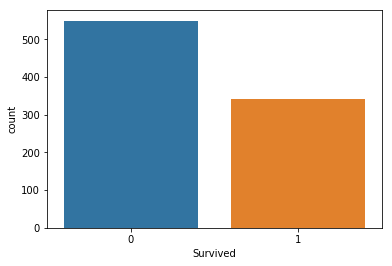

In [4]:
#Analyse the data
sns.countplot(x="Survived" , data=titanic)

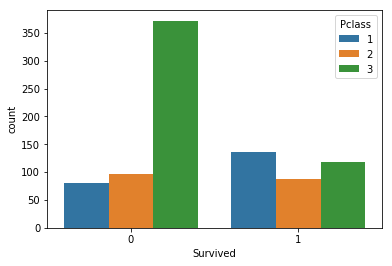

In [5]:
sns.countplot(x="Survived" ,hue="Pclass" ,data=titanic)

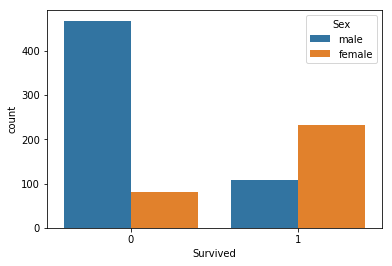

In [6]:
sns.countplot(x="Survived",hue="Sex" , data=titanic)

In [7]:
#data cleaning
titanic.drop("Cabin" , axis=1, inplace=True)

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
titanic.dropna(inplace=True)

In [10]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [12]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [13]:
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
x= titanic.drop('Survived' , axis=1)
y=titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
embarked = pd.get_dummies(titanic['Embarked'] , drop_first=True)
embarked.head()



,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
titanic=pd.concat([titanic,sex , embark , embarked] , axis=1)

In [23]:
titanic.head(5)

,Survived,Age,SibSp,Parch,Ticket,Fare,male,C,Q,S,Q,S,male,C,Q,S,Q,S
0,0,22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,1,1,0,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,1,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,1,0,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,0,1,0,1,0,0,0,1,0,1
4,0,35.0,0,0,373450,8.0500,1,0,0,1,0,1,1,0,0,1,0,1


In [34]:
titanic.drop(['Sex','Embarked','Pclass','Name','PassengerId'],axis=1 , inplace=True)


KeyError: "['Sex' 'Embarked' 'Pclass' 'Name' 'PassengerId'] not found in axis"

In [35]:
titanic.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,male,C,Q,S,Q,S,male,C,Q,S,Q,S
0,0,22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,1,1,0,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,1,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,1,0,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,0,1,0,1,0,0,0,1,0,1
4,0,35.0,0,0,373450,8.0500,1,0,0,1,0,1,1,0,0,1,0,1


In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test =train_test_split(x , y, test_size=0.2 , random_state=1)

In [19]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [36]:
logistic.fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'S'

In [37]:
logistic.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [38]:
model.score(x_test ,y_test)

NameError: name 'model' is not defined